In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('car_prices.csv', encoding= 'unicode_escape')

In [7]:
df.shape

(558837, 16)

In [8]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [11]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [12]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [13]:
df.dropna(inplace=True)

In [15]:
df.drop_duplicates(inplace=True)

In [27]:
df['saledate'] = pd.to_datetime(df['saledate'])

In [21]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True, errors='coerce')

In [28]:
df['saledate'].dtypes

dtype('<M8[ns]')

In [29]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [32]:
df[['year', 'mmr', 'sellingprice']].describe()

,year,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000
mean,2010.210980,13837.058964,13690.512058
std,3.822151,9532.229273,9613.033738
min,1990.000000,25.000000,1.000000
25%,2008.000000,7425.000000,7200.000000
50%,2012.000000,12300.000000,12200.000000
75%,2013.000000,18300.000000,18200.000000
max,2015.000000,182000.000000,230000.000000


# Exploratory Data Analysis

### Insight: Price Difference Between MMR and Selling Price

count    472325.000000
mean       -146.546905
std        1741.175011
min      -87750.000000
25%        -800.000000
50%         -50.000000
75%         650.000000
max      207200.000000
Name: price_diff, dtype: float64


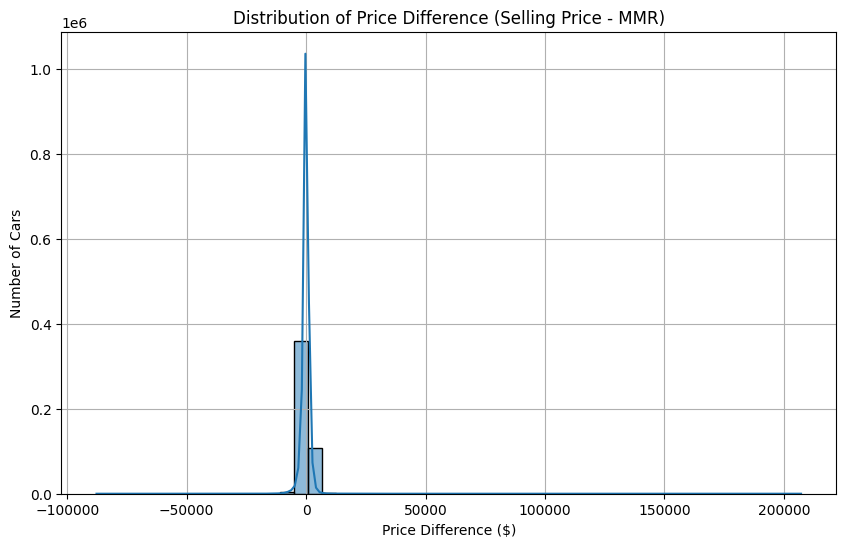

In [37]:
df['price_diff'] = df['sellingprice'] - df['mmr']
print(df['price_diff'].describe())

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price_diff'], bins=50, kde=True)
plt.title("Distribution of Price Difference (Selling Price - MMR)")
plt.xlabel("Price Difference ($)")
plt.ylabel("Number of Cars")
plt.grid(True)
plt.show()

### Average Selling Price by Car Make

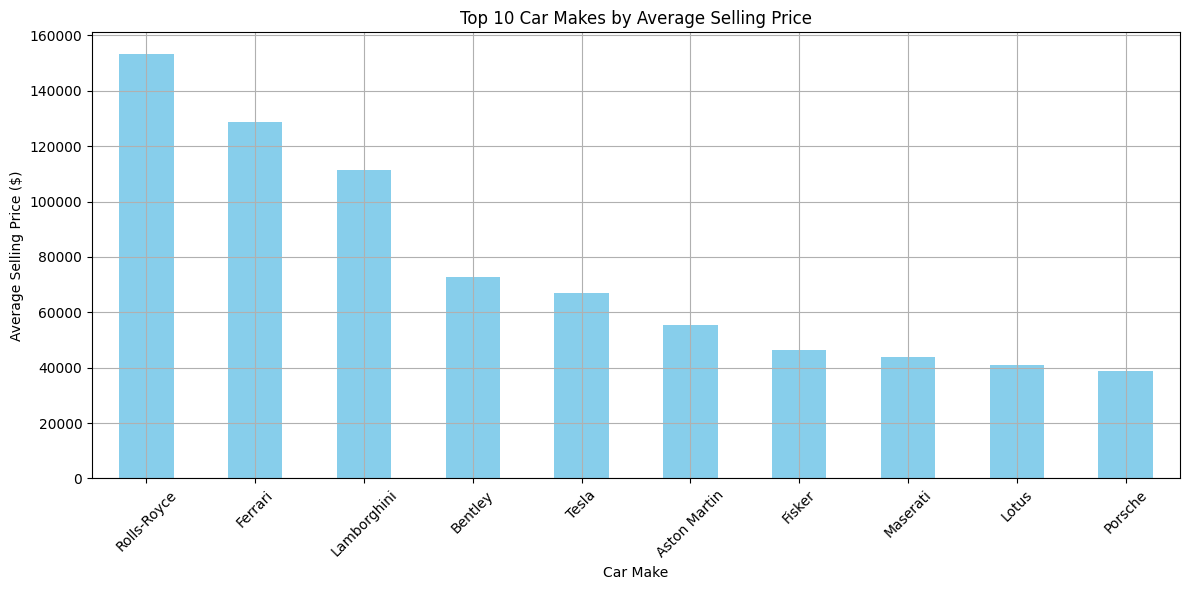

In [ ]:
# Group by car make and calculate average selling price
make_price = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)

# Show top 15 most expensive car brands
top_10_makes = make_price.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_makes.plot(kind='bar', color='skyblue')
plt.title("Top 10 Car Makes by Average Selling Price")
plt.ylabel("Average Selling Price ($)")
plt.xlabel("Car Make")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### State-wise Average Selling Price

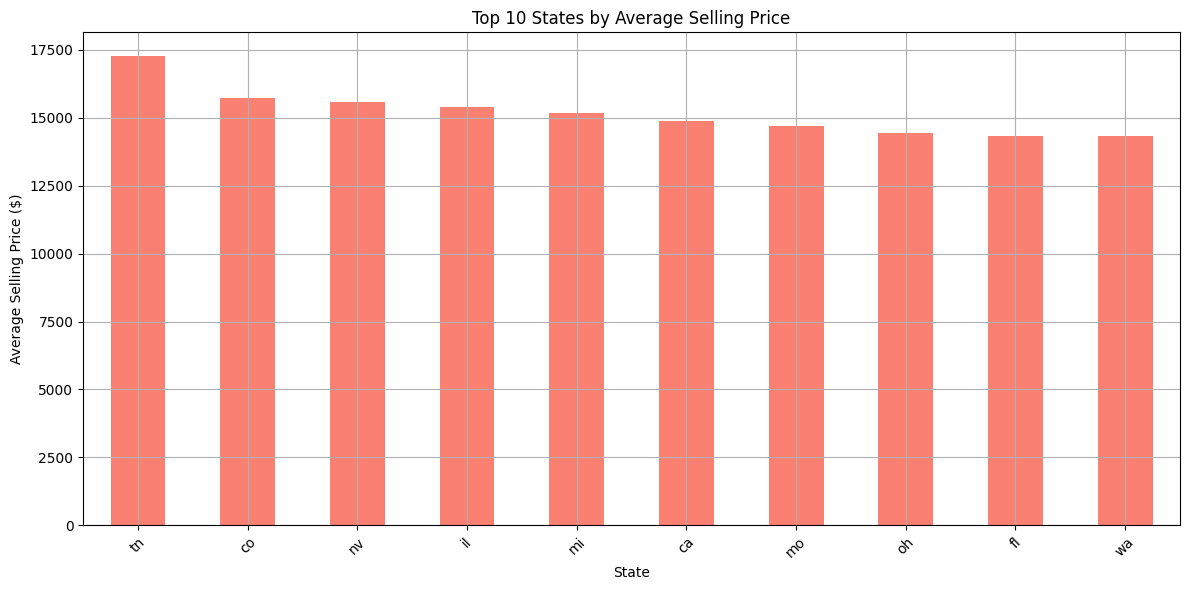

In [55]:
state_price = df.groupby('state')['sellingprice'].mean().sort_values(ascending=False)

# show top 10 states
top_10_states = state_price.head(10)

#plotting
plt.figure(figsize=(12, 6))
top_10_states.plot(kind= 'bar', color='salmon')
plt.title('Top 10 States by Average Selling Price')
plt.ylabel('Average Selling Price ($)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Selling Price vs Car Condition

### Selling Price vs Odometer Reading

### Top Sellers

### Monthly or Yearly Sales Volume

### Average Price Over Time

### State-wise Popular Car Brands

### Transmission Type vs Selling Price

### Interior or Color Preferences